# Домашнее задание

### по дисциплине «Методы машинного обучения»

Домашнее задание по дисциплине направлено на решение комплексной задачи машинного обучения. Домашнее задание включает выполнение следующих шагов:

 1. Поиск и выбор набора данных для построения моделей машинного обучения. На основе выбранного набора данных студент должен построить модели машинного обучения для решения или задачи классификации, или задачи регрессии.
 2. Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.
 3. Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.
 4. Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения. В зависимости от набора данных, порядок выполнения пунктов 2, 3, 4 может быть изменен.
 5. Выбор метрик для последующей оценки качества моделей. Необходимо выбрать не менее двух метрик и обосновать выбор.
 6. Выбор наиболее подходящих моделей для решения задачи классификации или регрессии. Необходимо использовать не менее трех моделей, хотя бы одна из которых должна быть ансамблевой.
 7. Формирование обучающей и тестовой выборок на основе исходного набора данных.
 8. Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.
 9. Подбор гиперпараметров для выбранных моделей. Рекомендуется подбирать не более 1-2 гиперпараметров. Рекомендуется использовать методы кросс-валидации. В зависимости от используемой библиотеки можно применять функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.
 10. Повторение пункта 8 для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей.
 11. Формирование выводов о качестве построенных моделей на основе выбранных метрик.

#### Отчет по домашнему заданию

Отчет по домашнему заданию должен содержать:

 1. Титульный лист.
 2. Постановку задачи машинного обучения.
 3. Описание последовательности действий студента по решению задачи машинного обучения.
 4. Выводы.

Датасет состоит из двух файлов:
 - train.csv - обучающая выборка
 - test.csv - тестовая выборка

Каждый файл содержит следующие колонки:
- PassengerId - id пассажира
- Survived - выживание (0 = Нет, 1 = Да)
- Pclass - Класс билетов (1 = 1-й, 2 = 2-й, 3 = 3-й)
- Name - Имя
- Sex - Пол
- Age - Возраст
- SibSp - о братьях и сестрах / супругах на борту Титаника
- Parch - родителей / детей на борту Титаника
- Ticket - Номер билета
- Fare - Пассажирский тариф
- Cabin - Номер каюты
- Embarked - порт погрузки (C = Шербур, Q = Квинстаун, S = Саутгемптон)

В рассматриваемом примере будем решать задачу классификации:

- Для решения задачи классификации в качестве целевого признака будем использовать "Survived". Поскольку признак содержит только значения 0 и 1, то это задача бинарной классификации.

## Импорт библиотек

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Загрузка данных

In [138]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [139]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [140]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Проведение разведочного анализа данных

In [141]:
train.shape

(891, 12)

In [142]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [143]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [144]:
train_new = train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)

In [145]:
train_new.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [146]:
train_new = train_new.dropna(axis=0, how='any')

In [147]:
train_new.shape

(712, 8)

In [148]:
train_new = pd.get_dummies(train_new)

In [149]:
train_new.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [150]:
train_new.isnull().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [151]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [152]:
test_new = test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)

In [153]:
test_new = test_new.dropna(axis=0, how='any')

In [154]:
test_new = pd.get_dummies(test_new)

In [155]:
test_new.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [156]:
test_new.shape

(331, 10)

In [157]:
test_new.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1


In [158]:
test_new.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [159]:
train_new.shape, test_new.shape

((712, 11), (331, 10))

## Построение графиков, необходимых для понимания структуры данных.

In [161]:
#основные статические характеритсики набора данных
train_new.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251,0.363764,0.636236,0.182584,0.039326,0.778090
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648,0.481420,0.481420,0.386597,0.194506,0.415823
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


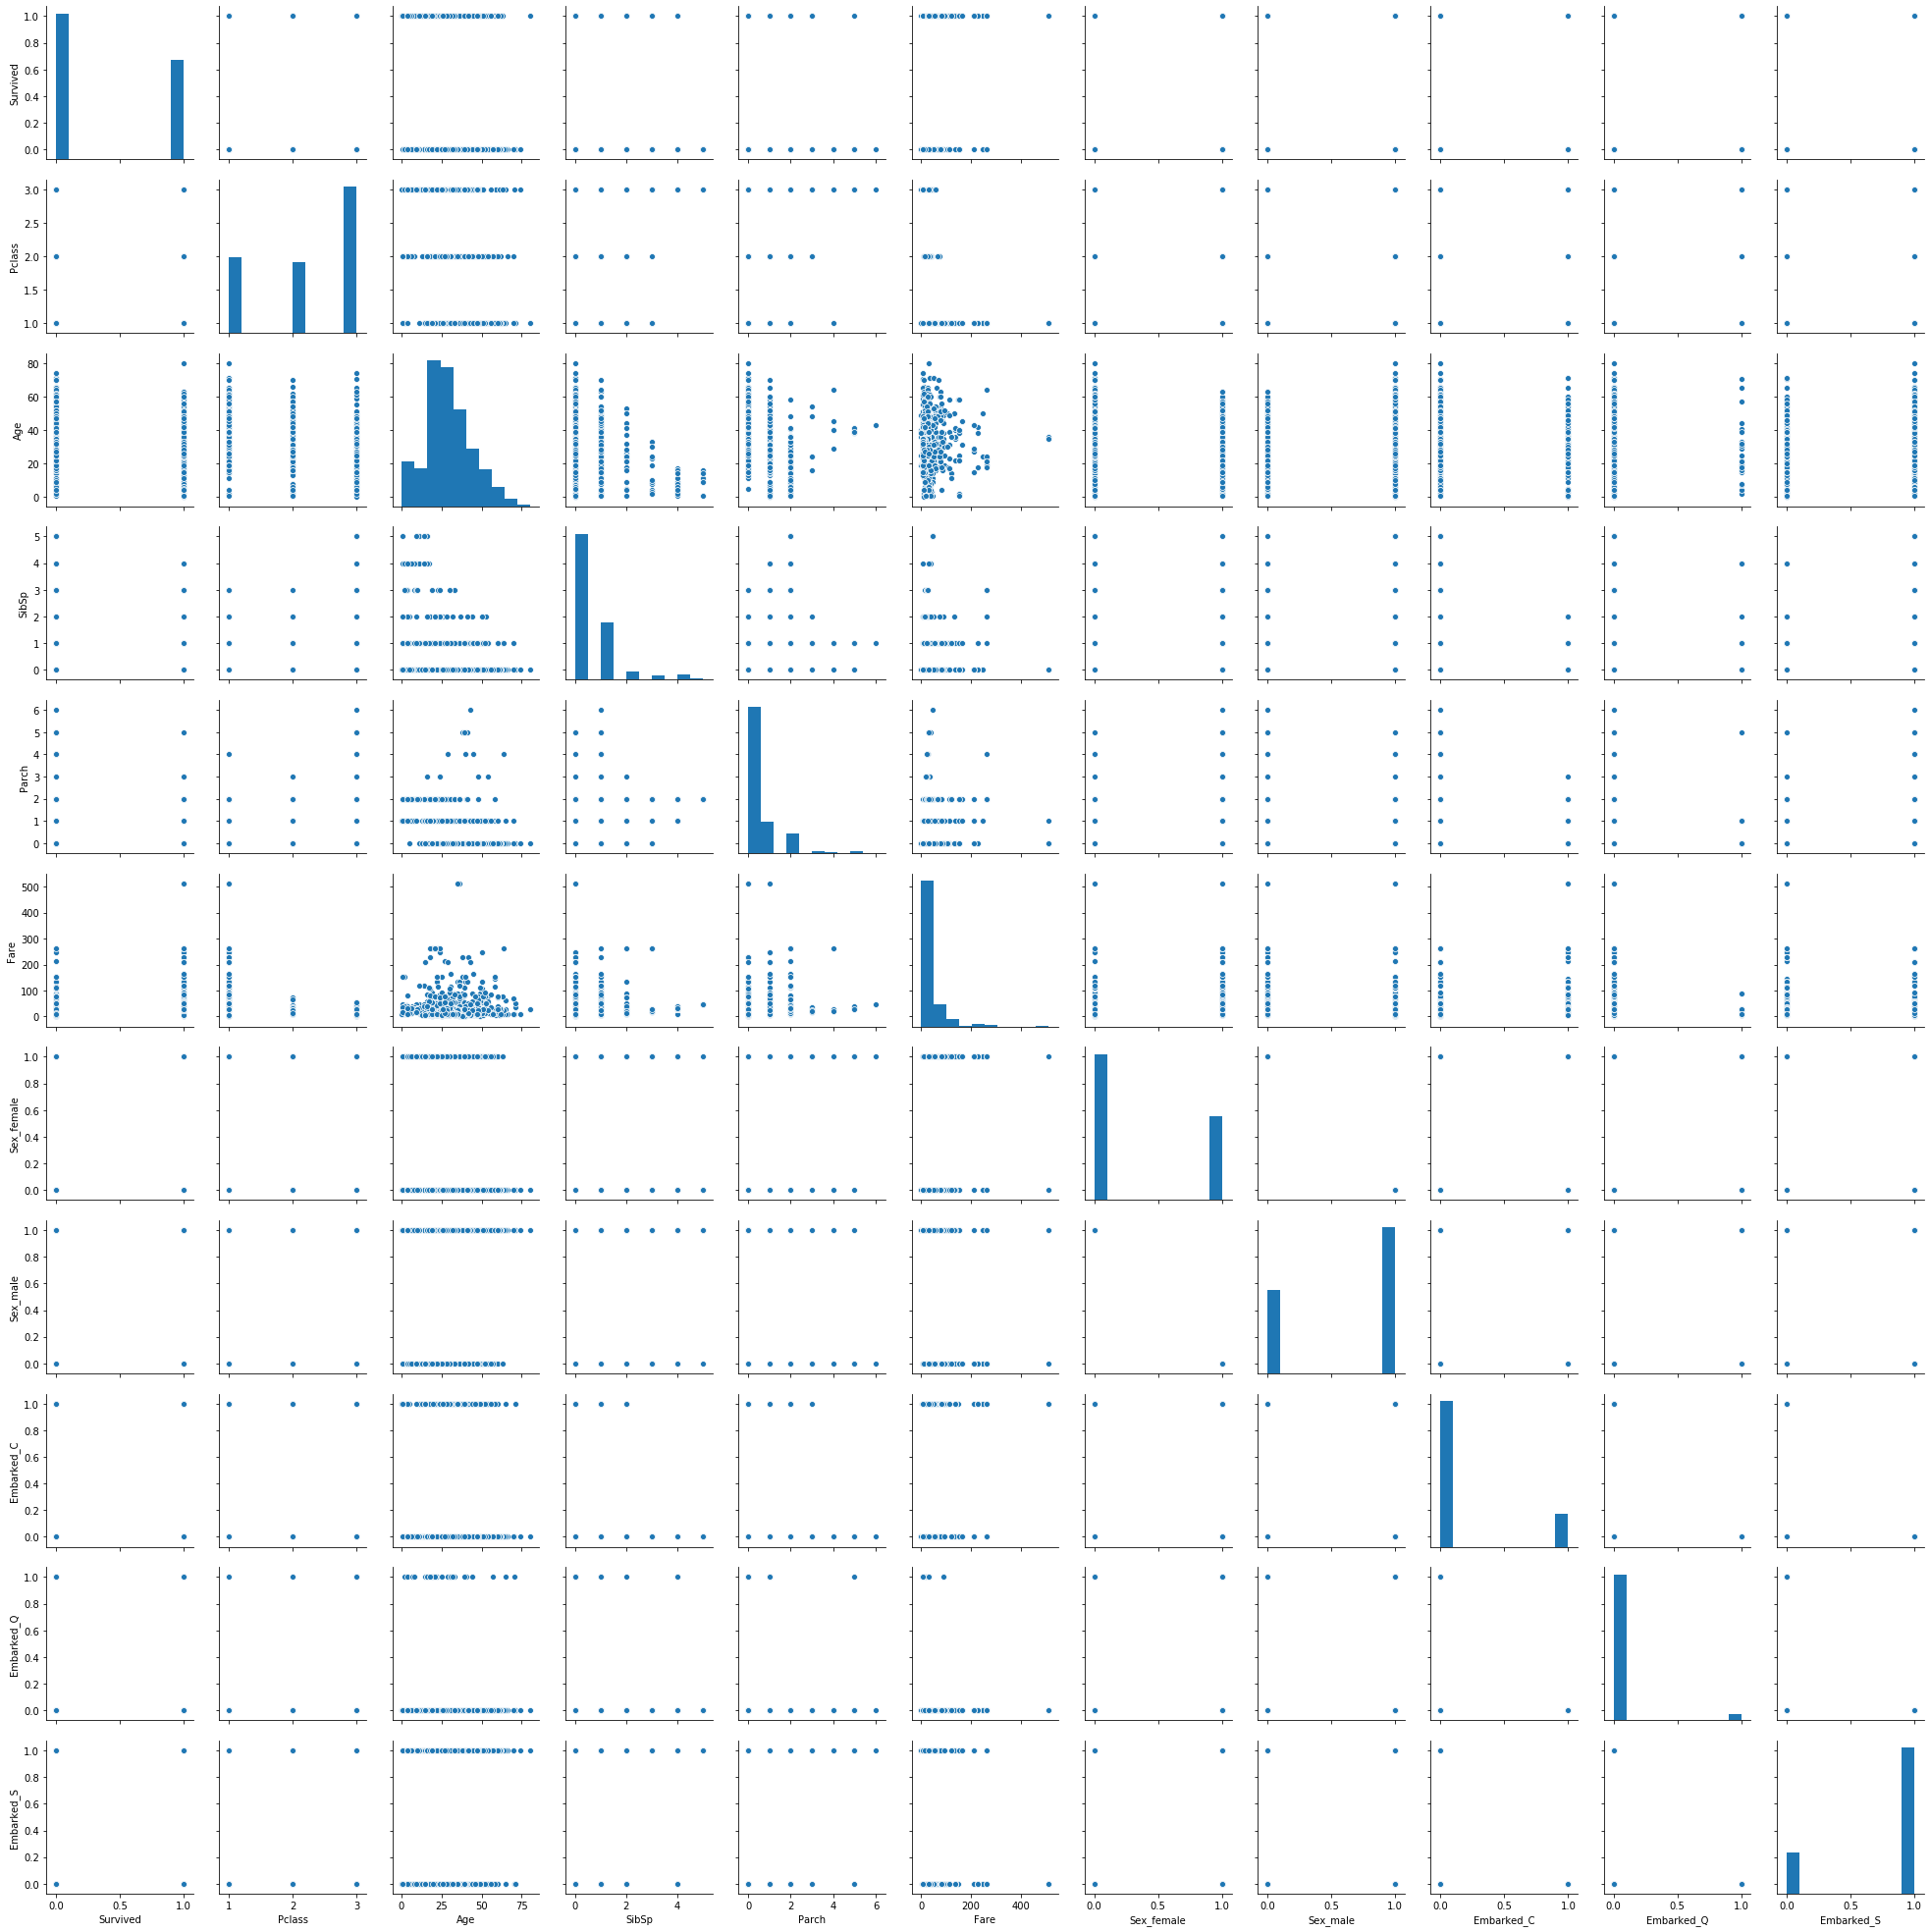

In [162]:
# Парные диаграммы
sns.pairplot(train_new)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


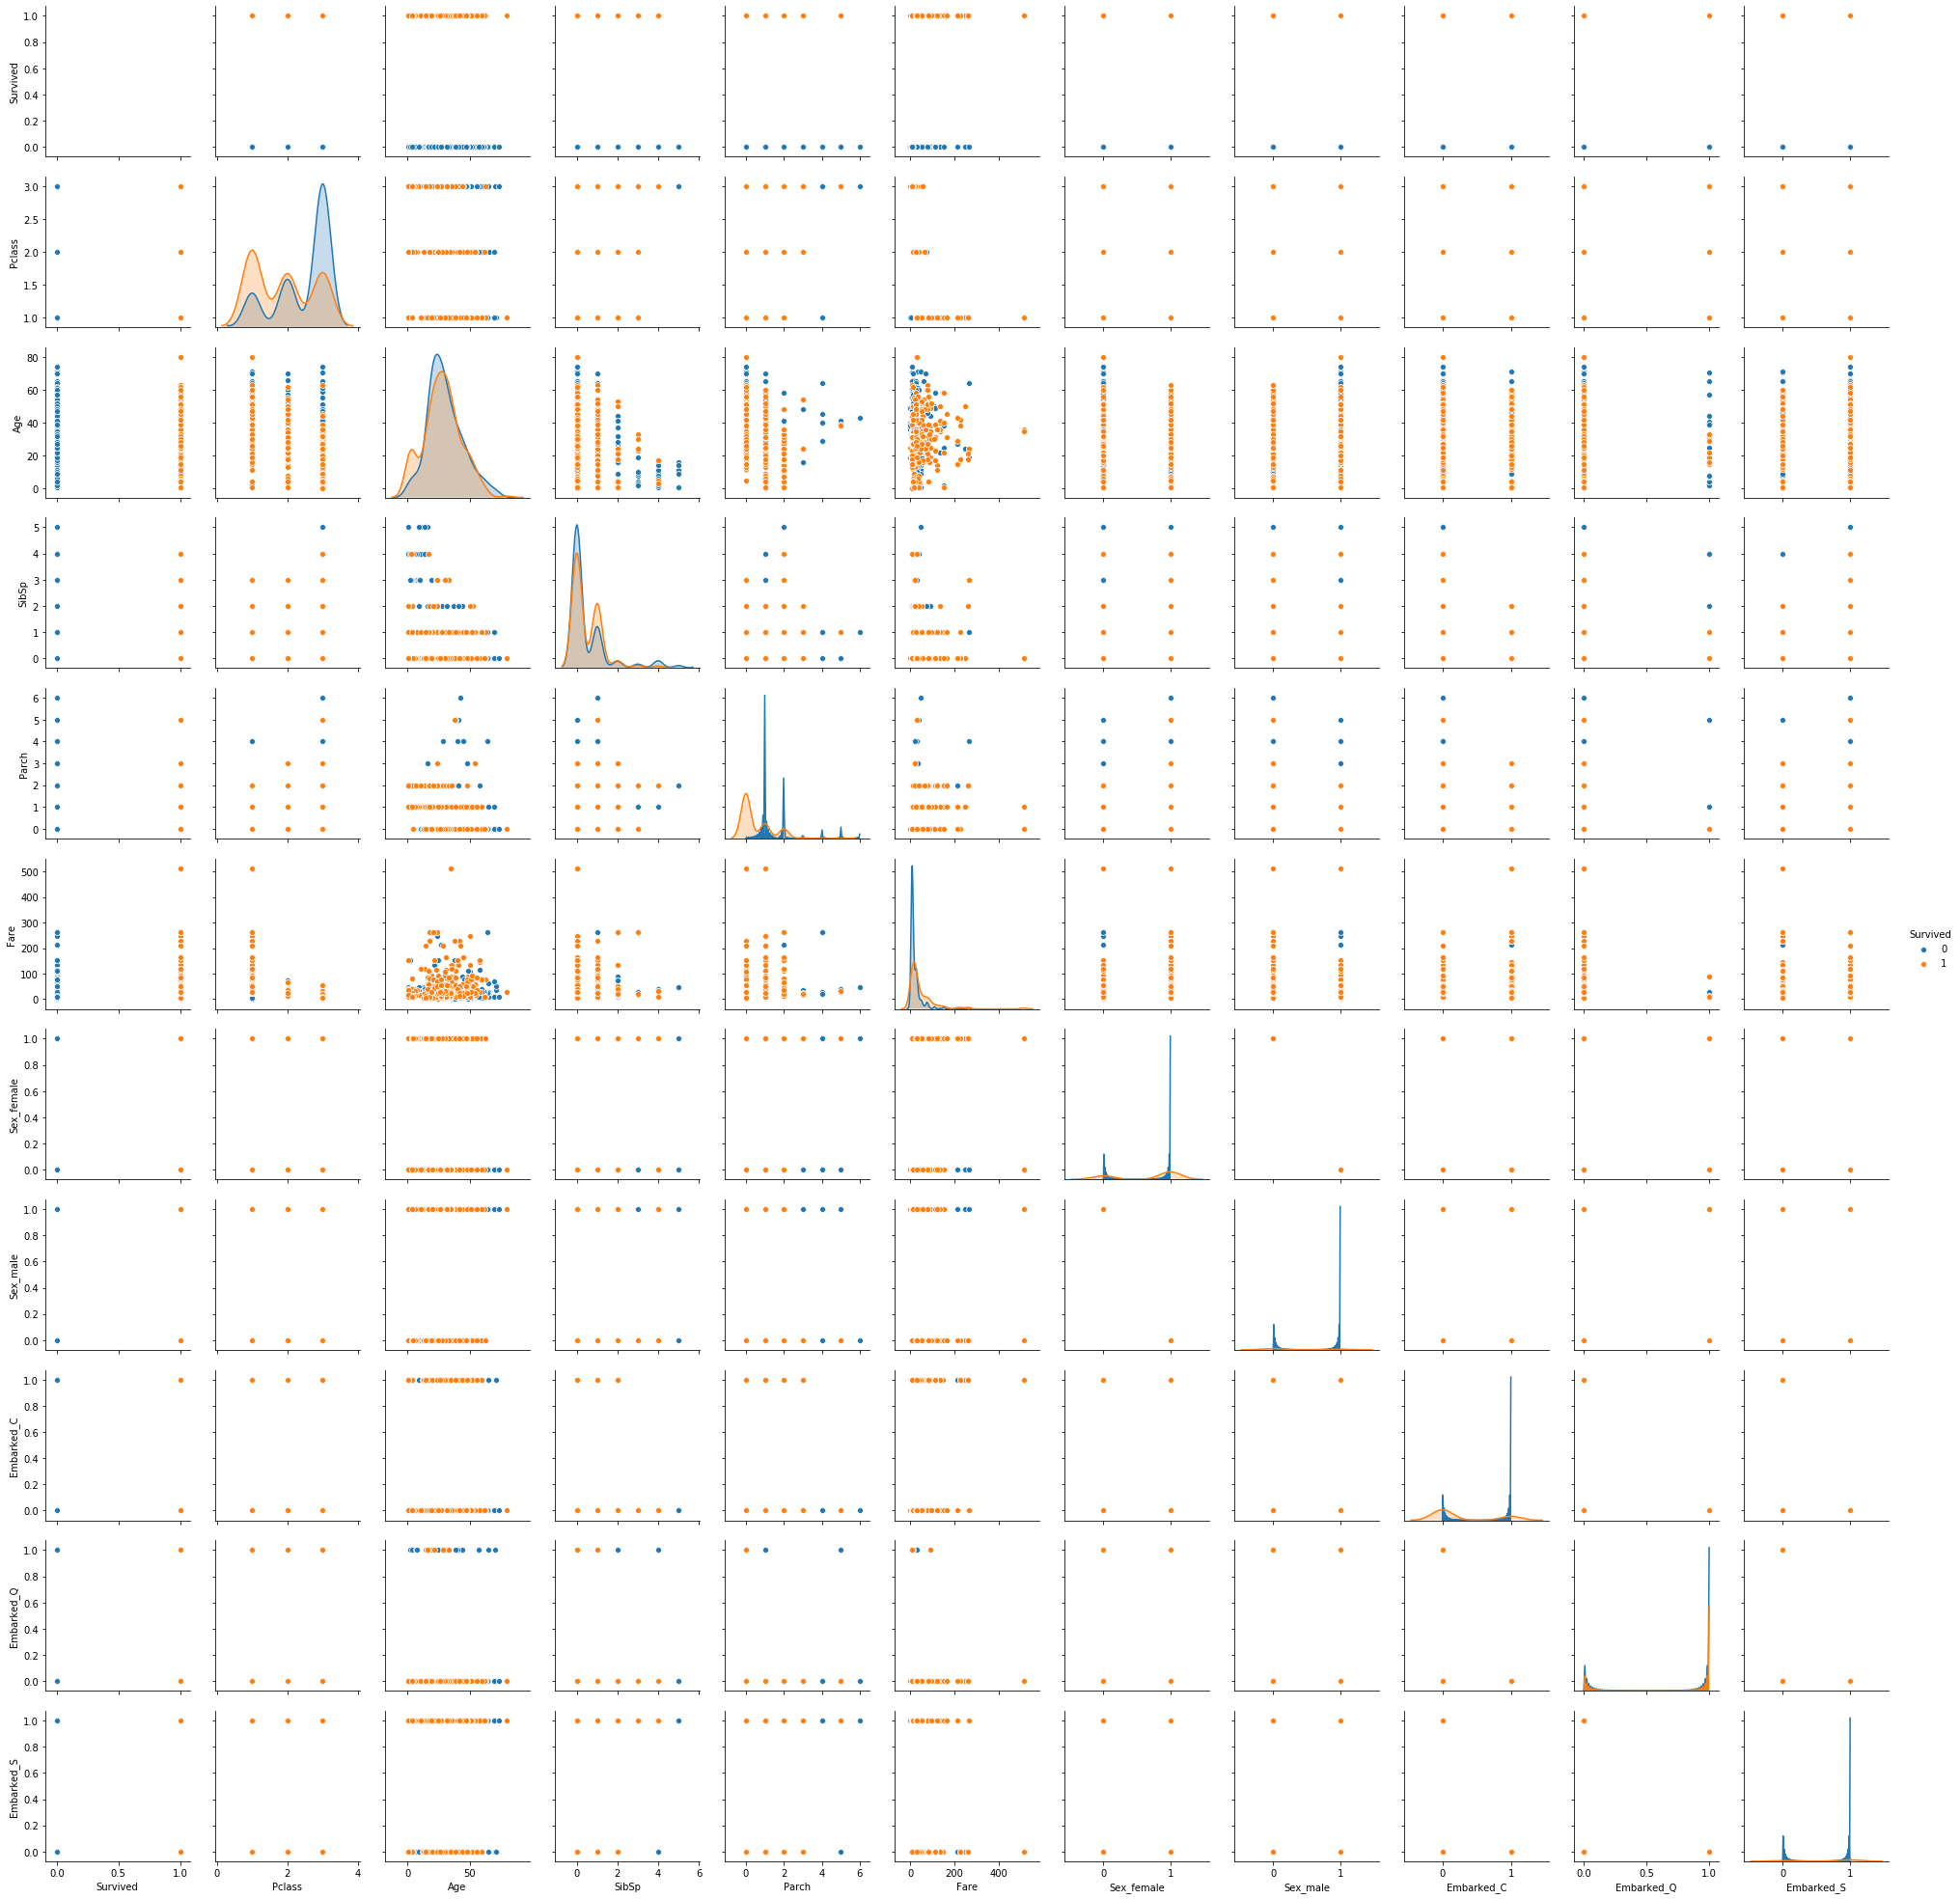

In [163]:
sns.pairplot(train_new, hue="Survived")

In [164]:
# Убедимся, что целевой признак
# для задачи бинарной классификации содержит только 0 и 1
train_new['Survived'].unique()

array([0, 1])

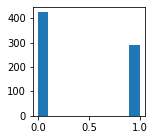

In [165]:
# Оценим дисбаланс классов для Survived
fig, ax = plt.subplots(figsize=(2,2)) 
plt.hist(train_new['Survived'])
plt.show()

In [166]:
train_new['Survived'].value_counts()

0    424
1    288
Name: Survived, dtype: int64

In [167]:
# посчитаем дисбаланс классов
total = train_new.shape[0]
class_0, class_1 = train_new['Survived'].value_counts()
print('Класс 0 составляет {}%, а класс 1 составляет {}%.'
      .format(round(class_0 / total, 4)*100, round(class_1 / total, 4)*100))

Класс 0 составляет 59.550000000000004%, а класс 1 составляет 40.45%.


#### Вывод. Дисбаланс классов присутствует, но является приемлемым.

In [168]:
train_new.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

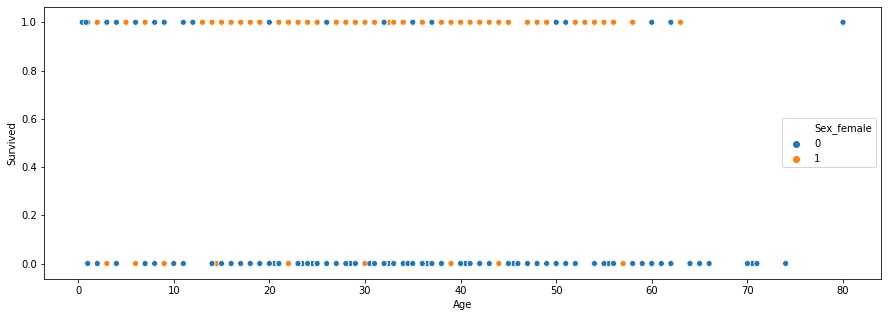

In [189]:
fig, ax = plt.subplots(figsize=(15,5))
sns.scatterplot(x='Age', y='Survived', data=train_new, hue="Sex_female")

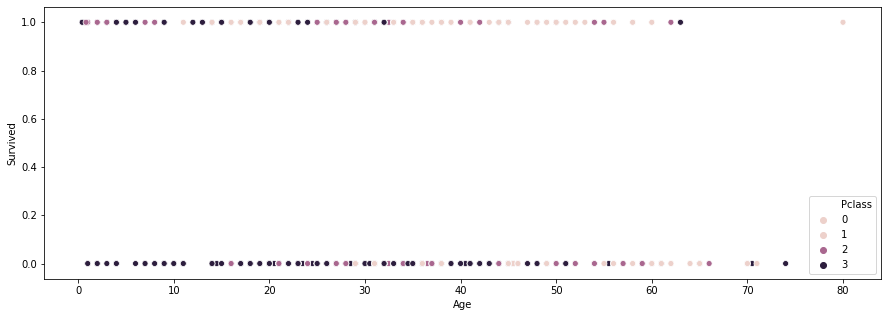

In [190]:
fig, ax = plt.subplots(figsize=(15,5))
sns.scatterplot(x='Age', y='Survived', data=train_new, hue="Pclass")

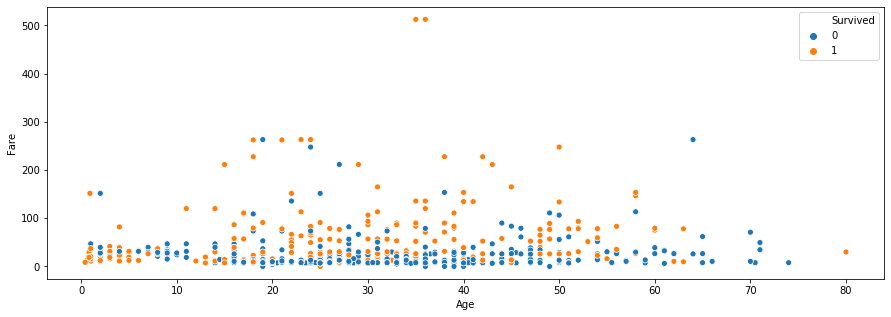

In [196]:
fig, ax = plt.subplots(figsize=(15,5))
sns.scatterplot(x='Age', y='Fare', data=train_new, hue="Survived")

## Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения.

In [197]:
train_new.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.356462,-0.082446,-0.015523,0.095265,0.266100,0.536762,-0.536762,0.195673,-0.048966,-0.159015
Pclass,-0.356462,1.000000,-0.365902,0.065187,0.023666,-0.552893,-0.150826,0.150826,-0.279194,0.131989,0.197831
Age,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143,-0.099037,0.099037,0.038268,-0.021693,-0.025431
SibSp,-0.015523,0.065187,-0.307351,1.000000,0.383338,0.139860,0.106296,-0.106296,-0.046227,0.051331,0.018968
Parch,0.095265,0.023666,-0.187896,0.383338,1.000000,0.206624,0.249543,-0.249543,-0.009523,-0.009417,0.013259
Fare,0.266100,-0.552893,0.093143,0.139860,0.206624,1.000000,0.182457,-0.182457,0.301337,-0.062346,-0.250994
Sex_female,0.536762,-0.150826,-0.099037,0.106296,0.249543,0.182457,1.000000,-1.000000,0.103611,0.027256,-0.109078
Sex_male,-0.536762,0.150826,0.099037,-0.106296,-0.249543,-0.182457,-1.000000,1.000000,-0.103611,-0.027256,0.109078
Embarked_C,0.195673,-0.279194,0.038268,-0.046227,-0.009523,0.301337,0.103611,-0.103611,1.000000,-0.095623,-0.884986
Embarked_Q,-0.048966,0.131989,-0.021693,0.051331,-0.009417,-0.062346,0.027256,-0.027256,-0.095623,1.000000,-0.378859


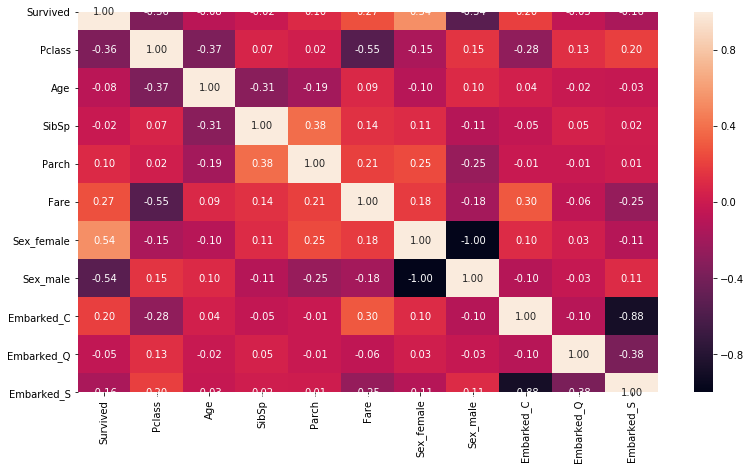

In [201]:
fig, ax = plt.subplots(figsize=(13,7))
sns.heatmap(train_new.corr(), annot=True, fmt='.2f')

На основе корреляционной матрицы можно сделать следующие выводы:
- Целевой признак классификации "Survived" наиболее сильно коррелирует с классом билетов (0.36), полом (0.54) и пассажирский тарифом (0.27). Эти признаки обязательно следует оставить в модели классификации.

## Выбор метрик для последующей оценки качества моделей.

Метрики, формируемые на основе матрицы ошибок:

#### 1. Метрика precision:
Можно переводить как точность, но такой перевод совпадает с переводом метрики "accuracy". Доля верно предсказанных классификатором положительных объектов, из всех объектов, которые классификатор верно или неверно определил как положительные.

#### 2. Метрика recall (полнота):
Доля верно предсказанных классификатором положительных объектов, из всех действительно положительных объектов.

#### 3. Метрика F1
-мера
Для того, чтобы объединить precision и recall в единую метрику используется F-мера, которая вычисляется как среднее гармоническое от precision и recall. 

## Выбор моделей для задачи классификации
1. SGDClassifier - стохастический градиентный спуск. 
2. DecisionTreeClassifier - дерево решений.
3. RandomForestClassifier - случайный лес.

In [202]:
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier

In [ ]:
y = train_new['Survived']

In [207]:
train_new = train_new.drop('Survived', axis=1)

In [212]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(
    train_new,
    y,
    test_size=0.2,
    random_state=1
)

In [213]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((569, 10), (569,), (143, 10), (143,))

## Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров

Стохастический градиентный спуск

In [214]:
sgd = SGDClassifier().fit(X_train, Y_train)
predicted_sgd = sgd.predict(X_test)

In [215]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [217]:
def print_metrics(Y_test, predicted_value): 
    print("precision_score {}".format(
     precision_score(Y_test, predicted_sgd, average='weighted'))) 
    print("recall_score {}".format(
     recall_score(Y_test, predicted_sgd, average='weighted'))) 
    print("f1_score {}".format(
      f1_score(Y_test, predicted_sgd, average='weighted')))

In [218]:
 print_metrics(Y_test, predicted_sgd)

precision_score 0.7490737970546048
recall_score 0.7062937062937062
f1_score 0.707328288150206


Дерево решений

In [219]:
dt = DecisionTreeClassifier().fit(X_train, Y_train)
predicted_dt = dt.predict(X_test)
print_metrics(Y_test, predicted_dt)

precision_score 0.7490737970546048
recall_score 0.7062937062937062
f1_score 0.707328288150206


Случайный лес

In [221]:
rfc = RandomForestClassifier().fit(X_train, Y_train)
predicted_rfc = rfc.predict(X_test)
print_metrics(Y_test, predicted_rfc)

precision_score 0.7490737970546048
recall_score 0.7062937062937062
f1_score 0.707328288150206


/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## Подбор гиперпараметров для выбранных моделей. Рекомендуется использовать методы кросс-валидации. В зависимости от используемой библиотеки можно применять функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.

#### SGDClassifier

In [230]:
sgd = SGDClassifier().fit(X_train, Y_train)
print("train accuracy:",sgd.score(X_train, Y_train))
print("test accuracy:",sgd.score(X_test,Y_test))
predicted_sgd = sgd.predict(X_test)
print_metrics(Y_test, predicted_sgd)

train accuracy: 0.7486818980667839
test accuracy: 0.7342657342657343
precision_score 0.7572525398612355
recall_score 0.7342657342657343
f1_score 0.736566463839191


#### RandomForestClassifier

In [231]:
rfc = RandomForestClassifier().fit(X_train, Y_train)
print("train accuracy:",rfc.score(X_train, Y_train))
print("test accuracy:",rfc.score(X_test,Y_test))
predicted_rfc = rfc.predict(X_test)
print_metrics(Y_test, predicted_rfc)

train accuracy: 0.9718804920913884
test accuracy: 0.8111888111888111
precision_score 0.7572525398612355
recall_score 0.7342657342657343
f1_score 0.736566463839191


/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


#### DecisionTreeClassifier

In [232]:
dt = DecisionTreeClassifier().fit(X_train, Y_train)
print("train accuracy:",dt.score(X_train, Y_train))
print("test accuracy:",dt.score(X_test,Y_test))
predicted_dt = dt.predict(X_test)
print_metrics(Y_test, predicted_dt)

train accuracy: 0.9894551845342706
test accuracy: 0.7902097902097902
precision_score 0.7572525398612355
recall_score 0.7342657342657343
f1_score 0.736566463839191


In [233]:
rfc_n_range = np.array(range(5,100,5))
rfc_tuned_parameters = [{'n_estimators': rfc_n_range}]
rfc_tuned_parameters

[{'n_estimators': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
         90, 95])}]

### Подбор гиперпараметров для RandomForestClassifier

In [236]:
import warnings
from sklearn.model_selection import GridSearchCV 
warnings.filterwarnings('ignore')
gs_rfc = GridSearchCV(RandomForestClassifier(), rfc_tuned_parameters, cv=5,
                      scoring='accuracy')
gs_rfc.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [237]:
gs_rfc.best_params_

{'n_estimators': 80}

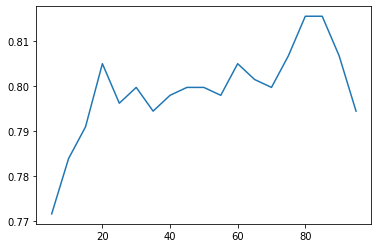

In [238]:
plt.plot(rfc_n_range, gs_rfc.cv_results_['mean_test_score'])

Сравнение моделей после подбора гиперпараметров RandomForestClassifier

In [239]:
rfc_optimized = RandomForestClassifier(n_estimators=gs_rfc.best_params_['n_estimators' ]).fit(X_train, Y_train)
predicted_rfc_opt = rfc_optimized.predict(X_test)
from sklearn.metrics import accuracy_score

In [240]:
 accuracy_score(Y_test, predicted_rfc_opt)

0.7692307692307693

In [241]:
 (precision_score(Y_test, predicted_rfc_opt, average='weighted'),
 recall_score(Y_test, predicted_rfc_opt, average='weighted'))

(0.7699137021170919, 0.7692307692307693)

In [242]:
f1_score(Y_test, predicted_rfc_opt, average='weighted')

0.7695342133211956

Подбор гиперпараметров для DecisionTreeClassifier

In [244]:
n_range = np.array(range(1,10,1))
tuned_parameters = [{'max_depth': n_range}]
tuned_parameters

[{'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}]

In [245]:
clf_gs_dt = GridSearchCV(DecisionTreeClassifier(random_state=1), tuned_parameters,
                          cv=5, scoring='accuracy')
clf_gs_dt.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=1,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}],
             pre_dispatch='2*n_jobs', refit=True, return_train

In [246]:
clf_gs_dt.best_params_

{'max_depth': 3}

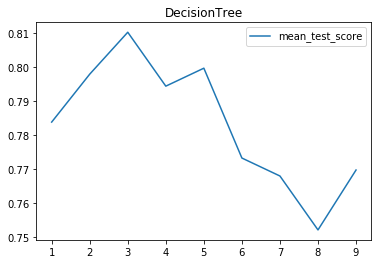

In [247]:
plt.title('DecisionTree')
plt.plot(n_range, clf_gs_dt.cv_results_['mean_test_score'],label='mean_test_score')
plt.legend()
plt.show()

Сравнение моделей после подбора гиперпараметров DecisionTreeClassifier

In [250]:
dt_optimized = DecisionTreeClassifier(max_depth=clf_gs_dt.best_params_['max_depth']).fit(X_train, Y_train)
predicted_dt_opt = dt_optimized.predict(X_test)

In [252]:
accuracy_score(Y_test, predicted_dt_opt)

0.7902097902097902

In [253]:
 (precision_score(Y_test, predicted_dt_opt, average='weighted'),
 recall_score(Y_test, predicted_dt_opt, average='weighted'))

(0.78881875511089, 0.7902097902097902)

In [254]:
 f1_score(Y_test, predicted_dt_opt, average='weighted')

0.788874918185263

Подбор гиперпараметров для SGDClassifier

In [255]:
n_range = np.array(range(0,100,5))
n_range = n_range / 100
tuned_parameters = [{'l1_ratio': n_range}]
tuned_parameters

[{'l1_ratio': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
         0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])}]

In [257]:
clf_gs_sgd = GridSearchCV(SGDClassifier(), tuned_parameters, cv=5,
                      scoring='accuracy')
clf_gs_sgd.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'l1_ratio': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])}],
             pre_dispat

In [258]:
 clf_gs_sgd.best_params_

{'l1_ratio': 0.6}

In [260]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot')

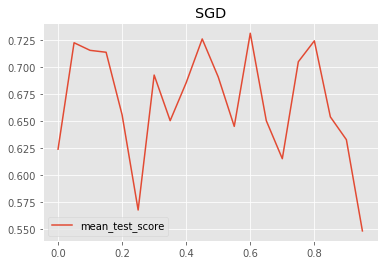

In [261]:
plt.title('SGD')
plt.plot(n_range, clf_gs_sgd.cv_results_['mean_test_score'],label='mean_test_score')
plt.legend()
plt.show()

Сравнение моделей после подбора гиперпараметров для SGDClassifier

In [265]:
sgd_optimized = SGDClassifier(l1_ratio=clf_gs_sgd.best_params_['l1_ratio']).fit(X_train, Y_train)
predicted_sgd_opt = sgd_optimized.predict(X_test)

In [266]:
 accuracy_score(Y_test, predicted_sgd_opt)

0.5664335664335665

In [267]:
(precision_score(Y_test, predicted_sgd_opt, average='weighted'),
 recall_score(Y_test, predicted_sgd_opt, average='weighted'))

(0.6997668997668998, 0.5664335664335665)

In [268]:
 f1_score(Y_test, predicted_sgd_opt, average='weighted')

0.5380015464761227

### Вывод:
Наибольшую точность показало дерево решений после подбора гиперпараметров. Остальные модели показали приемлемые результаты.
1. Decision Tree
2. RAndom Forest 
3. SGD
Таким образом, лучше всего подходит дерево решений.